<a href="https://colab.research.google.com/github/BrunoCapron/ESQ724-fundamentos_aprendizado_maquina/blob/main/Aprendizado_Nao_Supervisionado/PCA/PCA_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Um exemplo de implementação de PCA - Uso do conjunto de dados Iris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregamos os dados do conjunto de dados IRIS
iris = load_iris()

# Construimos nosso conjunto de dados de treino
X = iris.data
y = iris.target
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


PCA é sensível à escala dos atributos, então padronizamos os dados de entrada

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Aplicamos agora PCA. Neste caso, queremos reduzir o conjunto de dados IRIS de 4 dimensções a 2 componentes principais

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(y==0)
print(X_pca[y==0,0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[-2.26470281 -2.08096115 -2.36422905 -2.29938422 -2.38984217 -2.07563095
 -2.44402884 

Vizualizamos os resultados

3


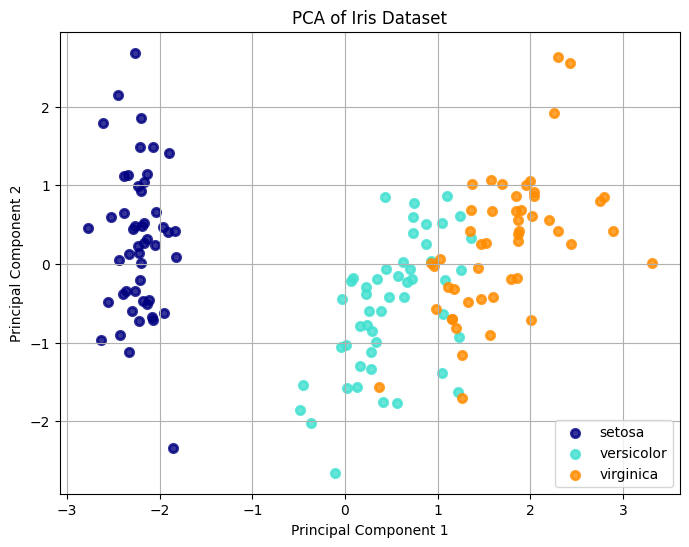

In [14]:
plt.figure(figsize=(8,6))
colors = ['navy', 'turquoise', 'darkorange']
print(len(target_names))

for i, color in zip(range(len(target_names)), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.8,lw=2, color=color, label=target_names[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

Olhando para a razão de variância contemplada pelos componentes principais

In [15]:
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative explained variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio by each principal component:
[0.72962445 0.22850762]

Cumulative explained variance ratio:
[0.72962445 0.95813207]


Determinando o número de componentes principais a partir da variância explicada acumulada

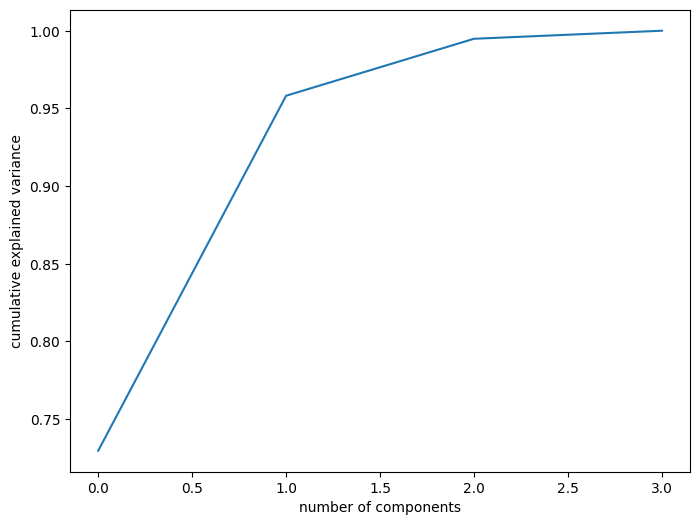

In [17]:
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [25]:
#numero de componentes principais explicando mais de 95% da variânmcia
#print(cumsum >= 0.95)
#d= np.argmax(cumsum >= 0.95) + 1
#print(d)

IsTrue = False
d=0
while IsTrue == False:
  if cumsum[d] >= 0.95:
    IsTrue = True
  d+=1
print(d)

pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_scaled)




2
